In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.read_csv('beauty.csv', nrows=2)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


In [3]:
df = pd.read_csv('beauty.csv', sep=';')

In [4]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


# Обычный график (plot), построенный по точкам 

In [5]:
y = [1,2,3,1,3,2]
y = np.array([1,2,3,1,3,2])
y = pd.Series(np.array([1,2,3,1,3,2]))

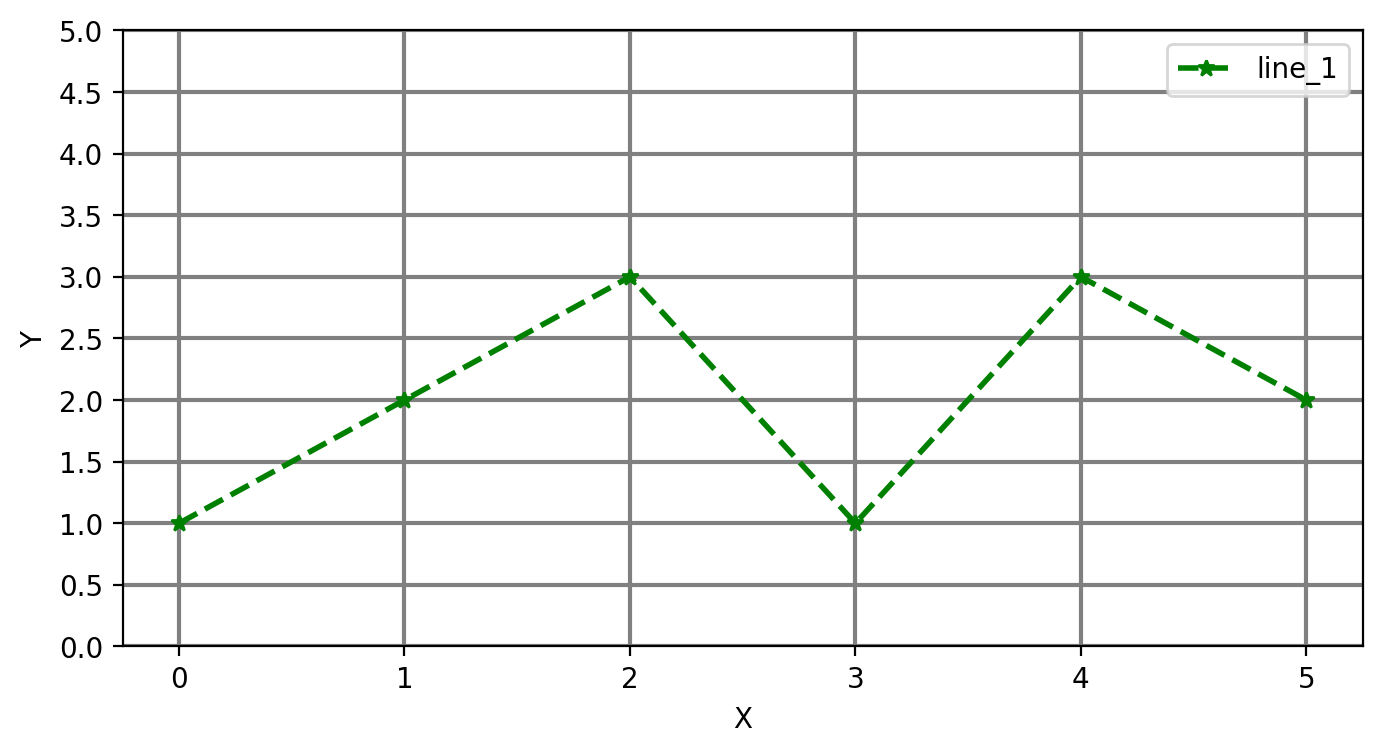

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(y, linewidth=2, color='green', marker='*', linestyle='dashed', label='line_1')
plt.legend()
plt.grid(color='grey', linestyle='-', linewidth=1.5)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xticks()
plt.xlabel('X')
plt.ylabel('Y');

# Scatter - точечный график

In [7]:
x = np.linspace(0, 5, 50)
y = x * (x - 2) * (x - 4)

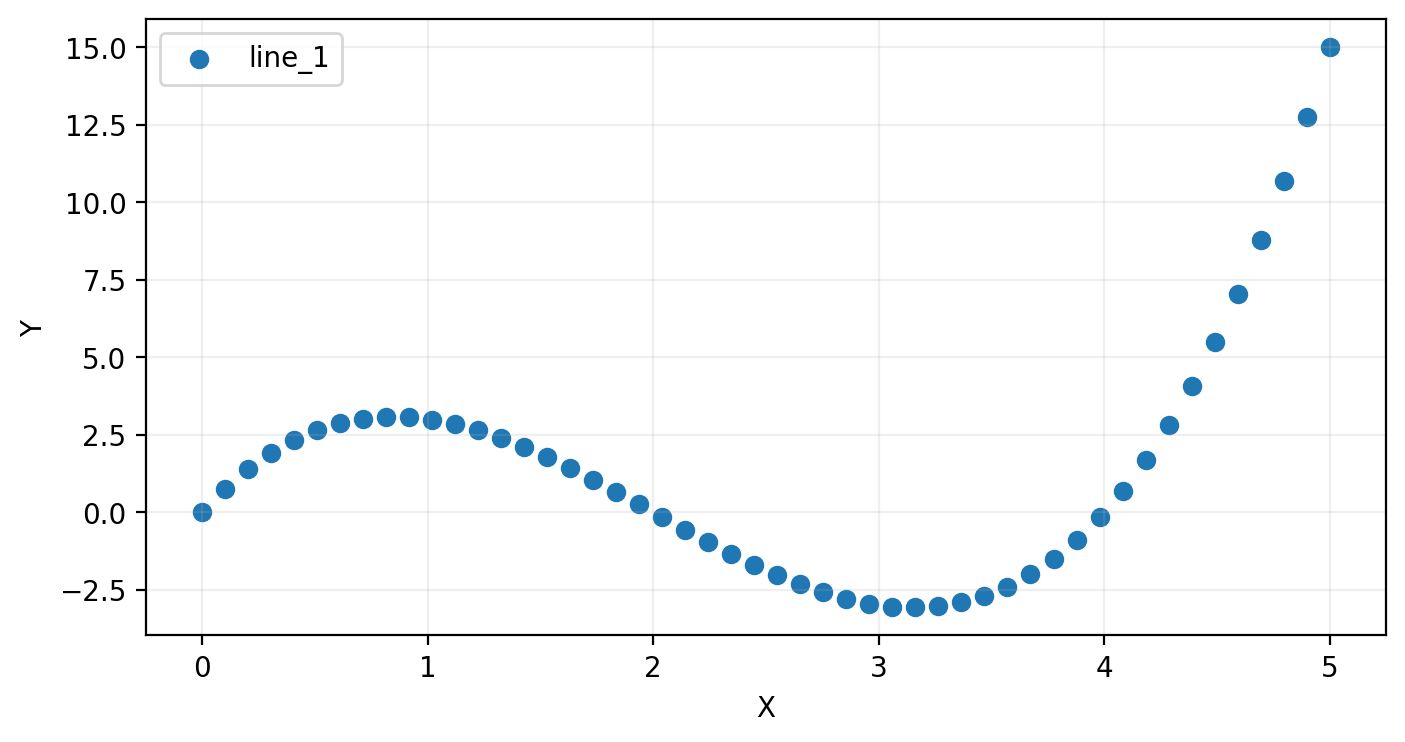

In [8]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='line_1')
plt.legend()
plt.grid(alpha=0.2)
plt.yticks()
plt.xticks()
plt.ylabel('Y')
plt.xlabel('X');

# Гистограмма

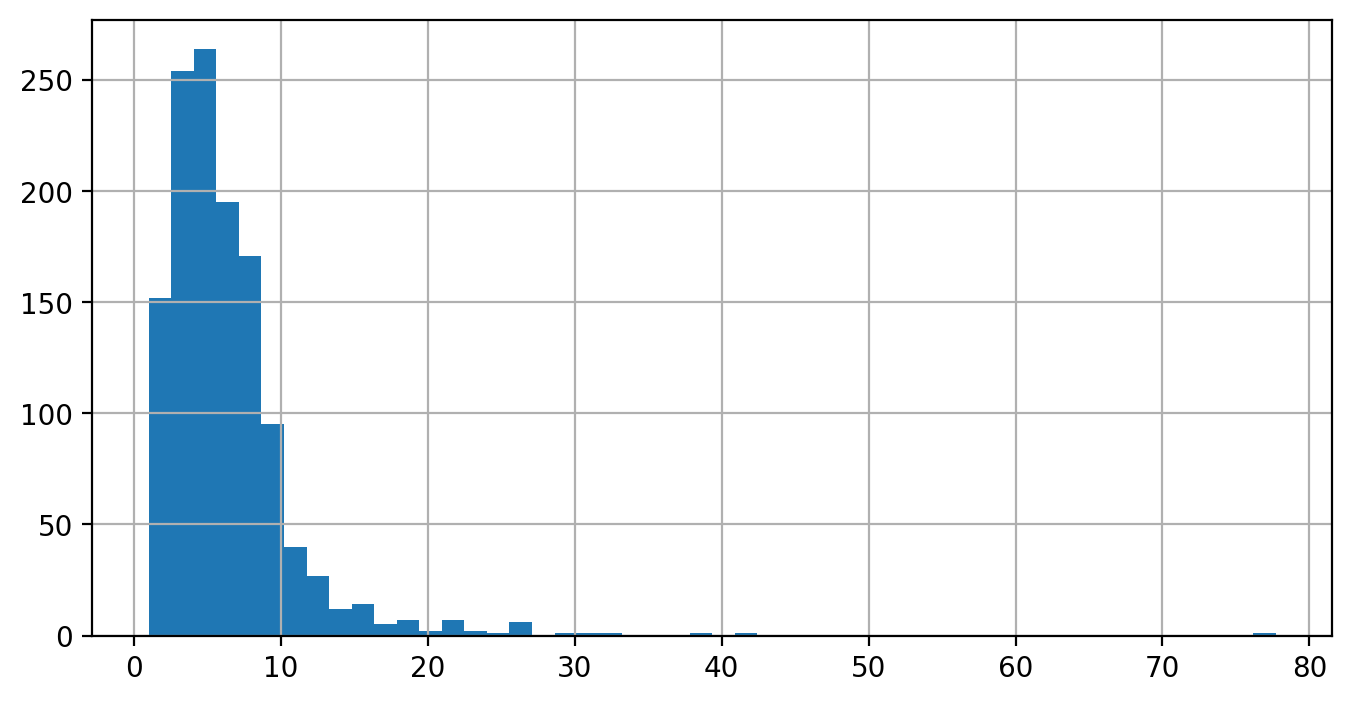

In [9]:
df.wage.hist(figsize=(8, 4), bins=50);

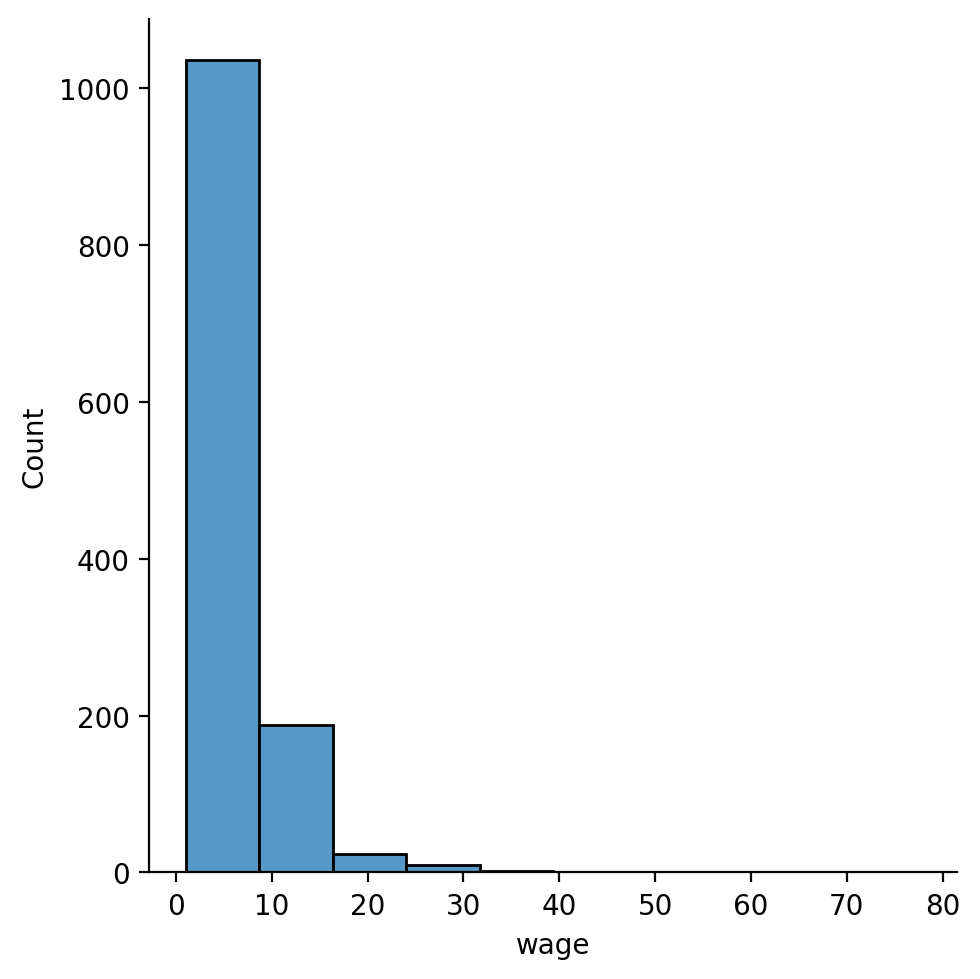

In [10]:
sns.displot(df.wage, bins=10);

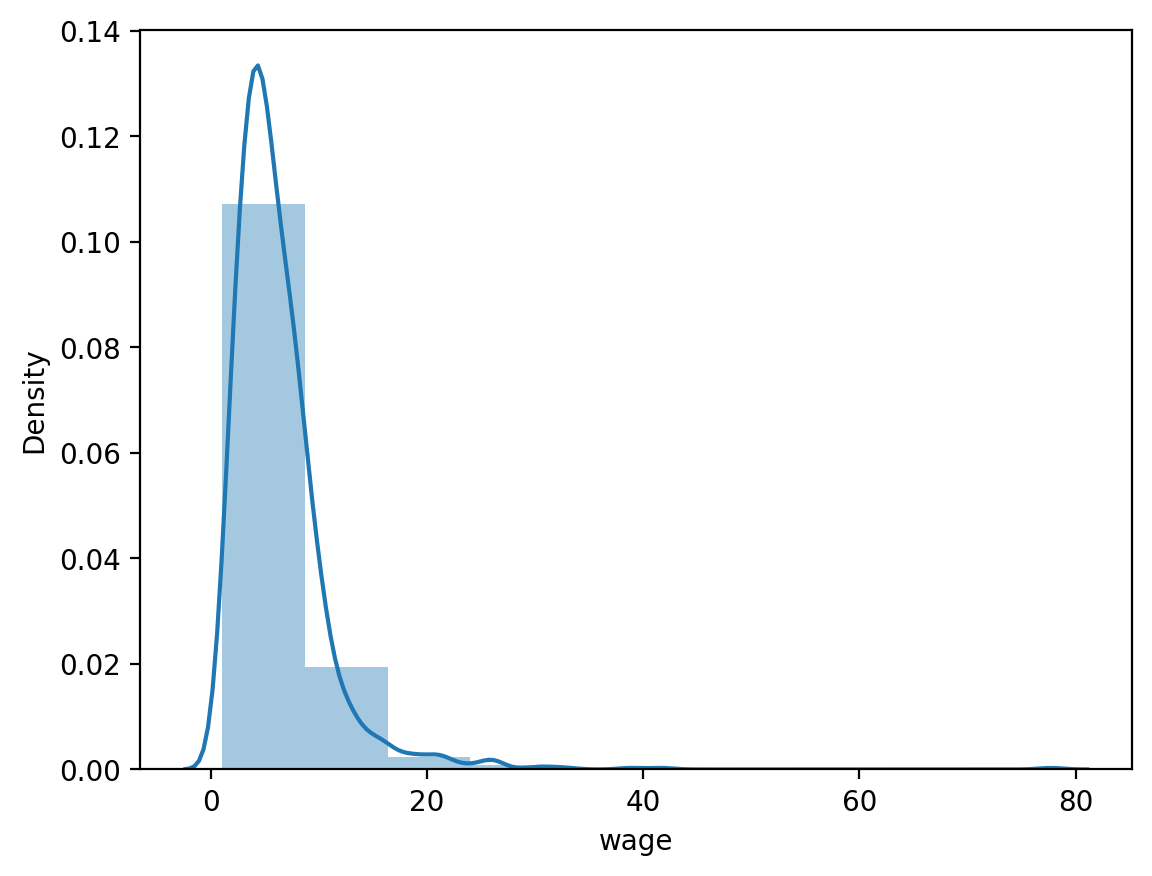

In [11]:
sns.distplot(df.wage, bins=10);

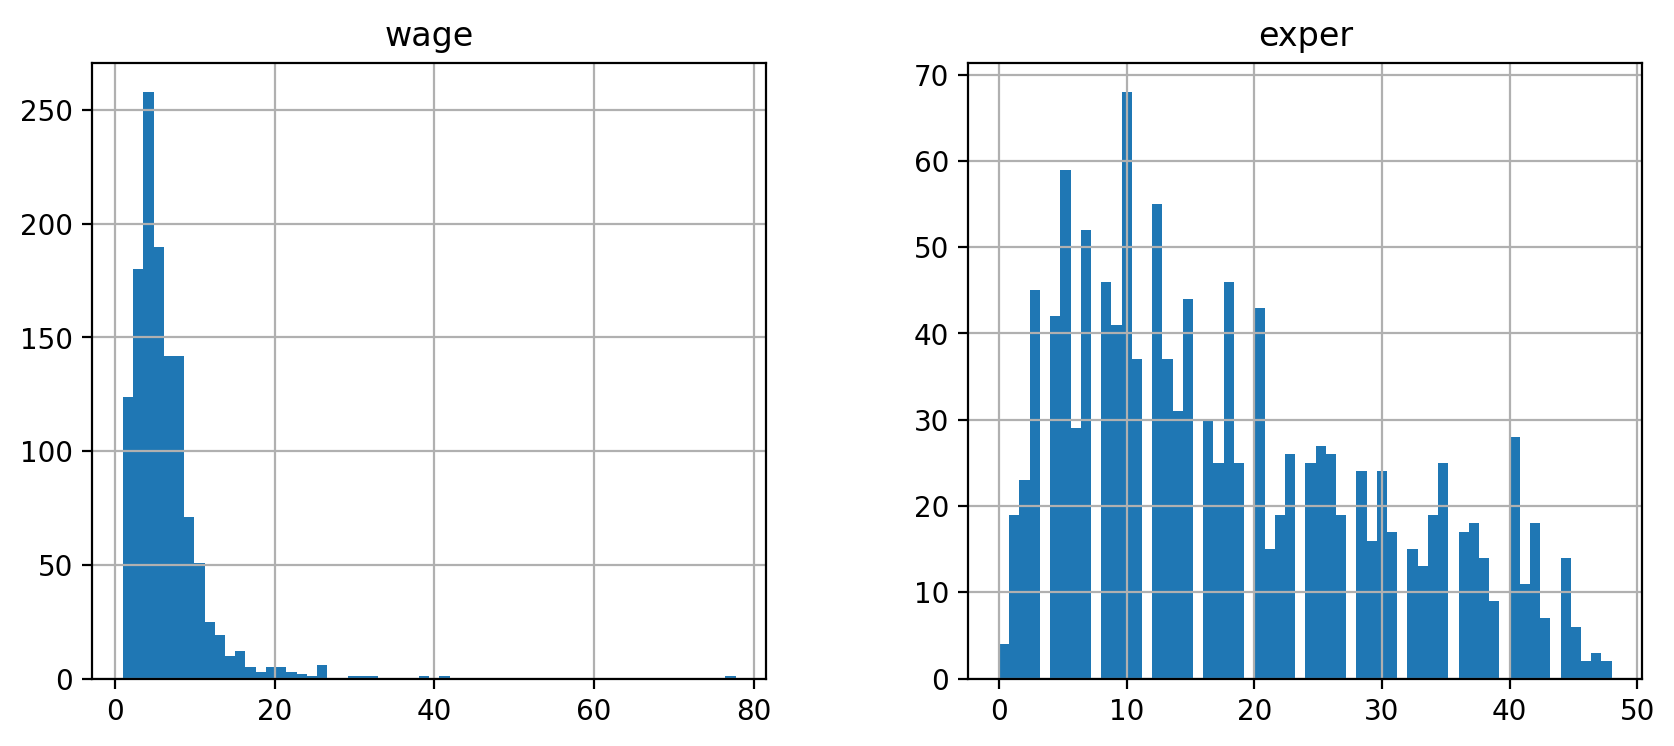

In [12]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4), bins=60);

# Столбчатая диаграмма

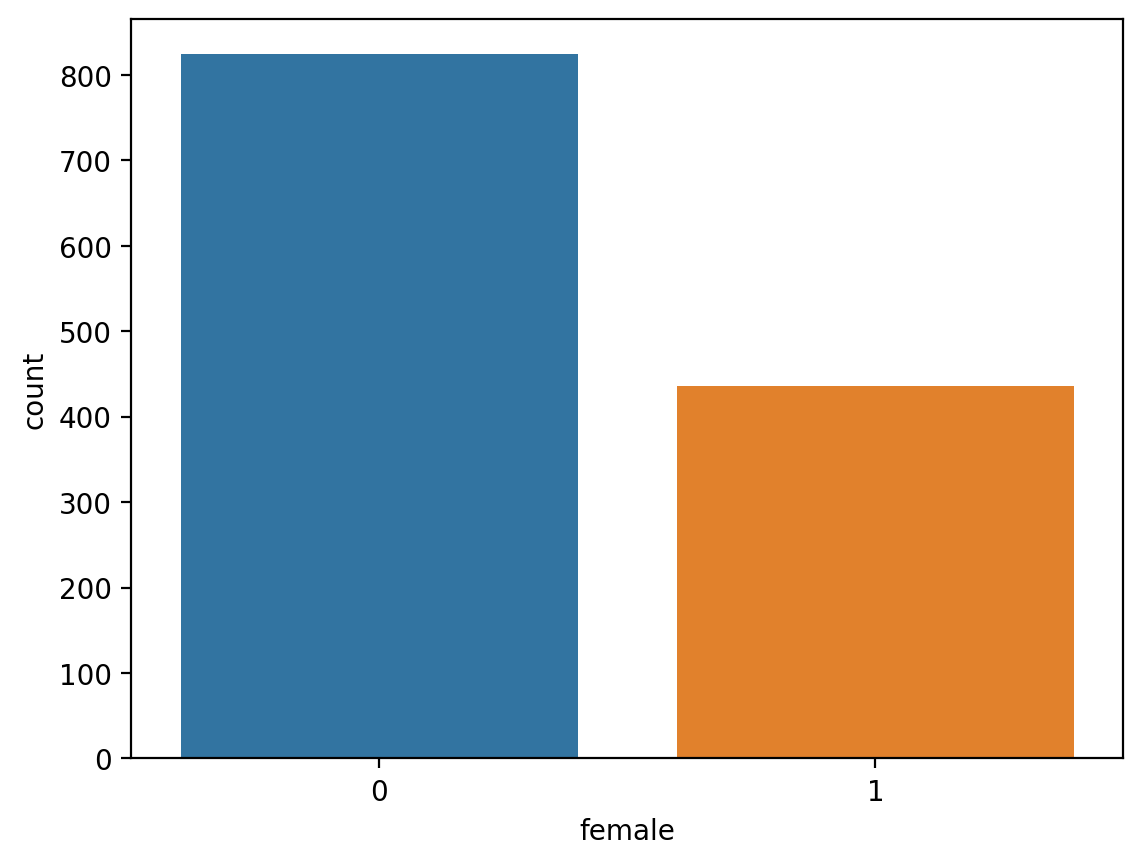

In [13]:
sns.countplot(x='female', data=df);

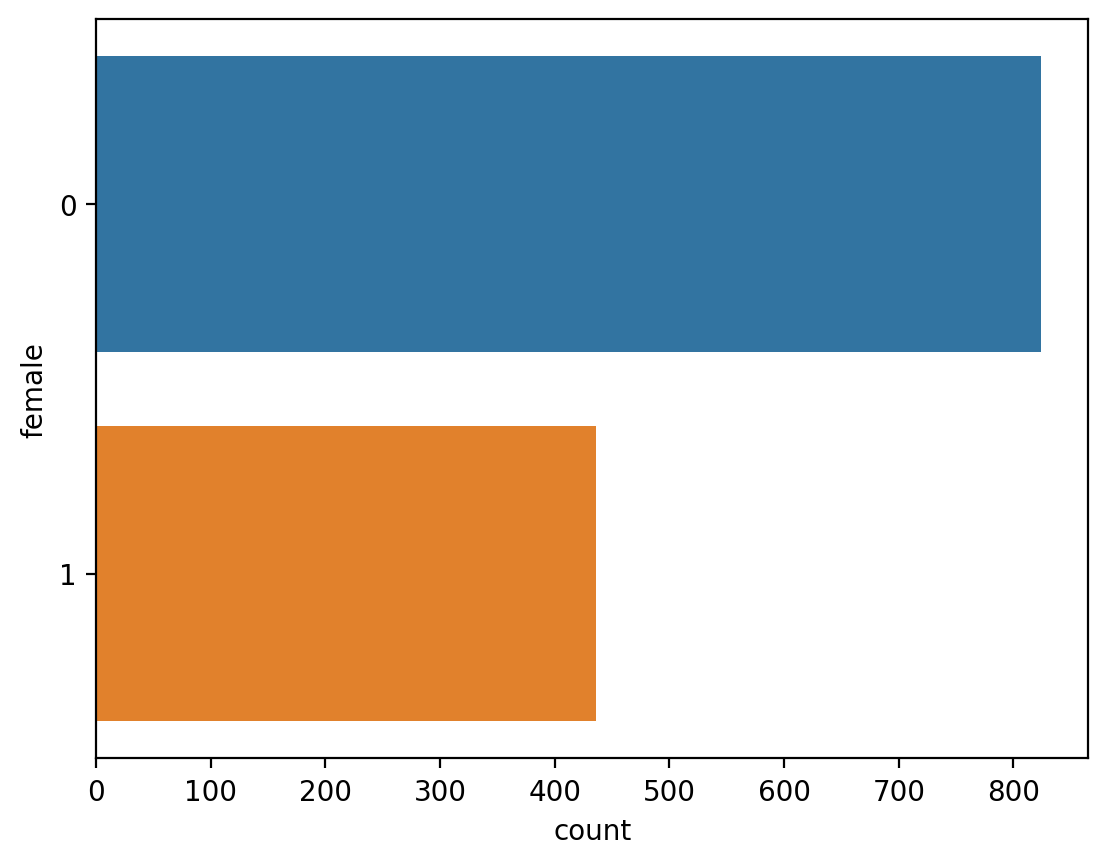

In [14]:
sns.countplot(y='female', data=df);

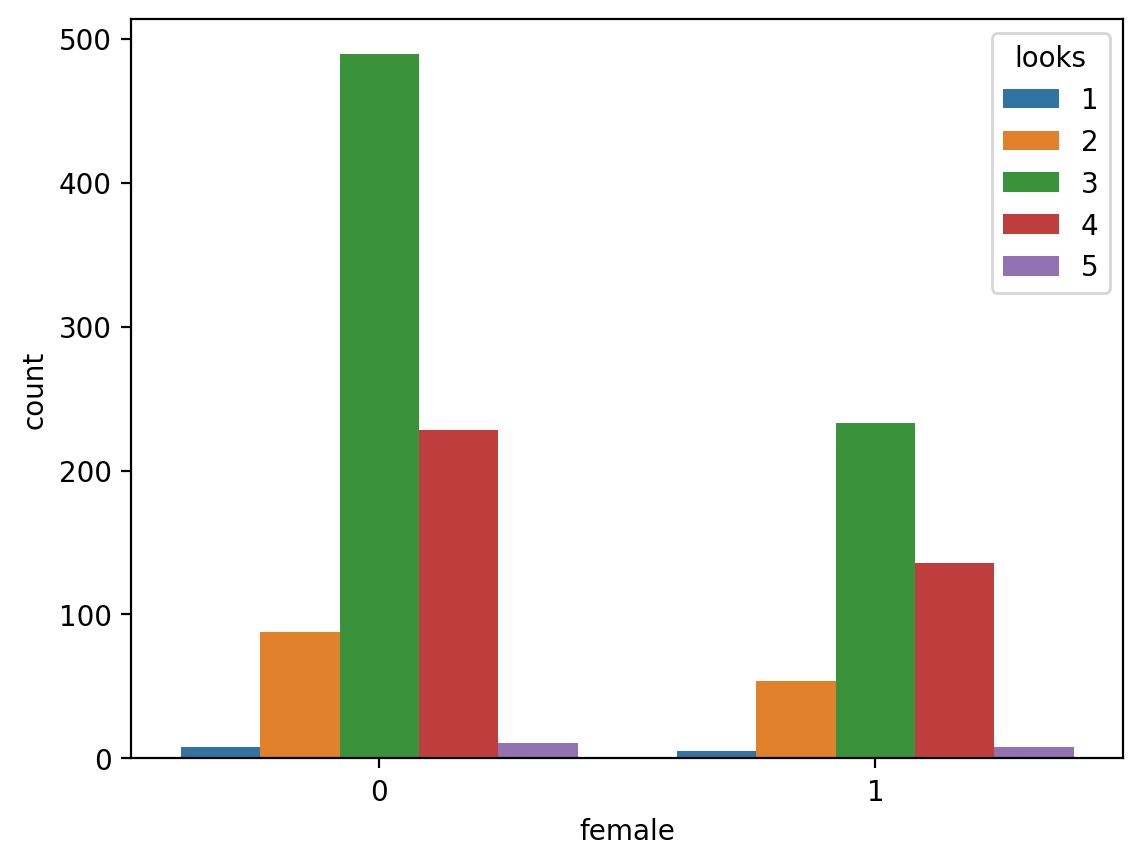

In [15]:
sns.countplot(x='female', hue='looks', data=df);

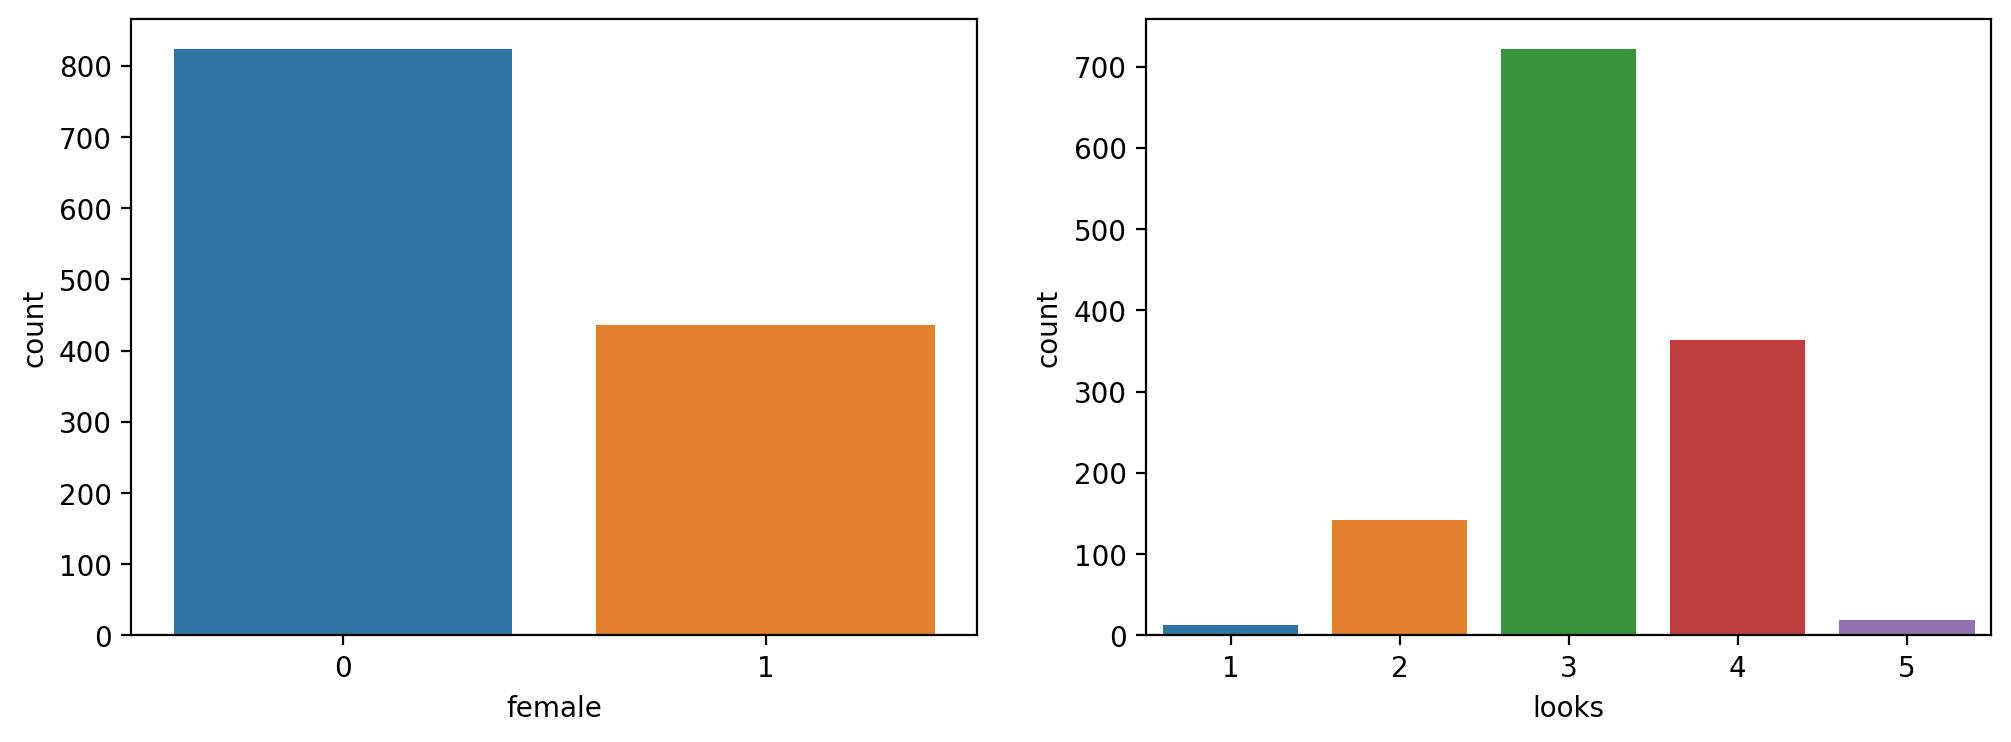

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='female', data=df, ax=axes[0])
sns.countplot(x='looks', data=df, ax=axes[1]);

# Круговая диаграмма

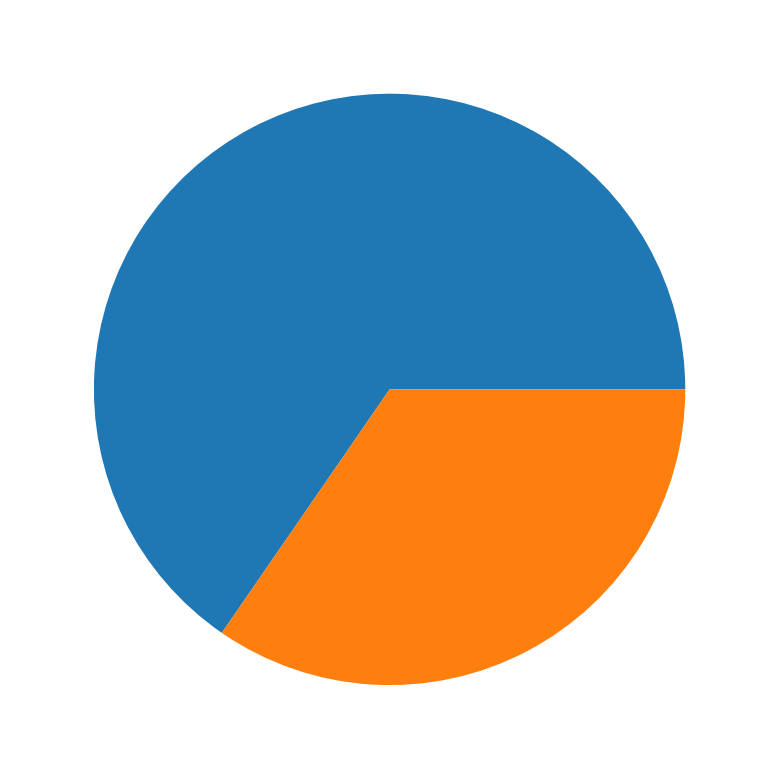

In [17]:
plt.pie(df.groupby('female')['wage'].count()); # круговая диаграмми (pie)

# Box plot

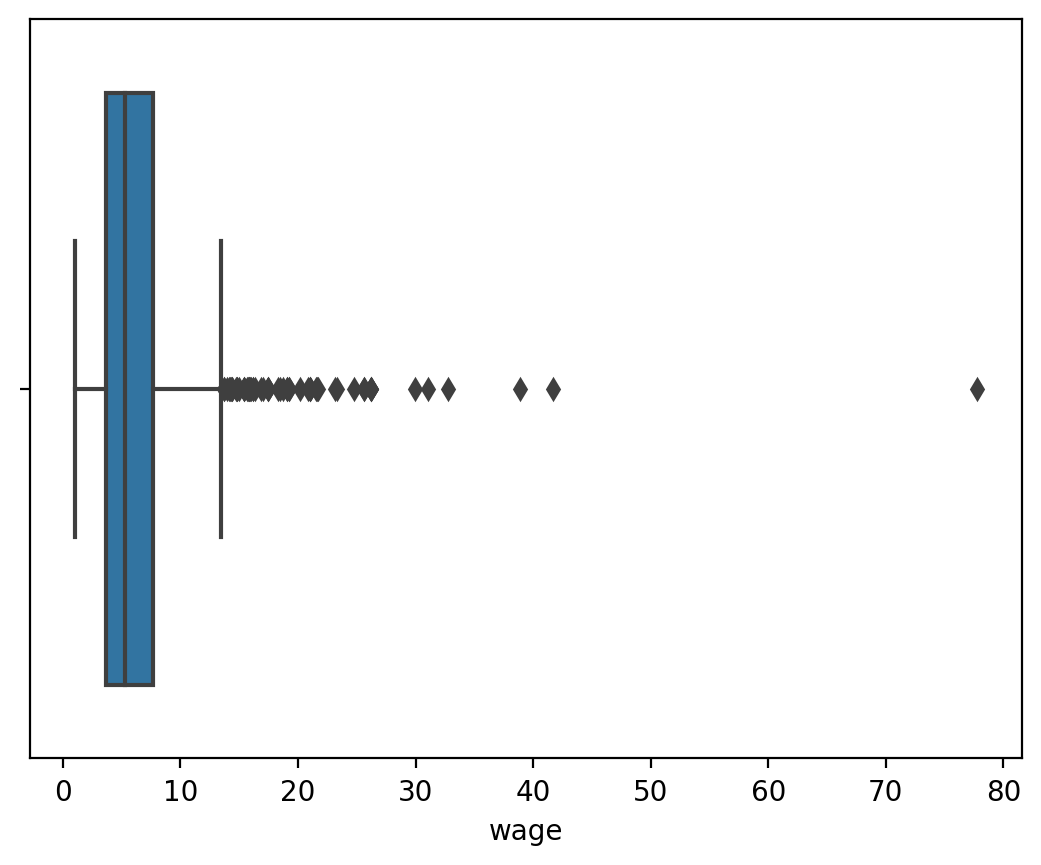

In [18]:
sns.boxplot(x='wage', data=df);

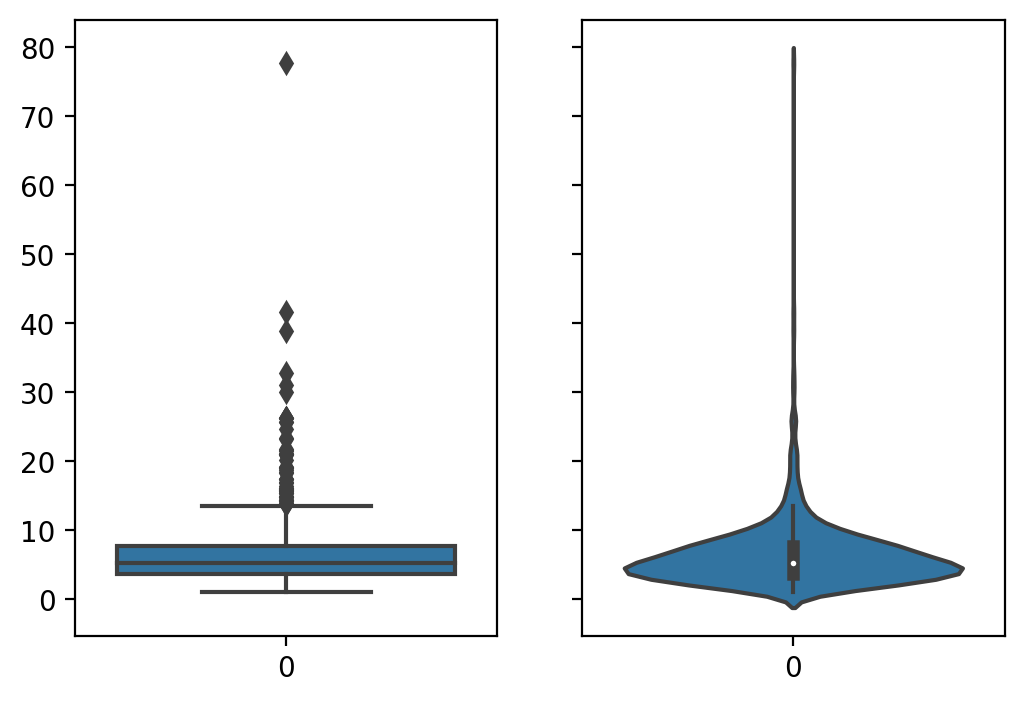

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0]);
sns.violinplot(data=df['wage'], ax=axes[1]);

# Join plot

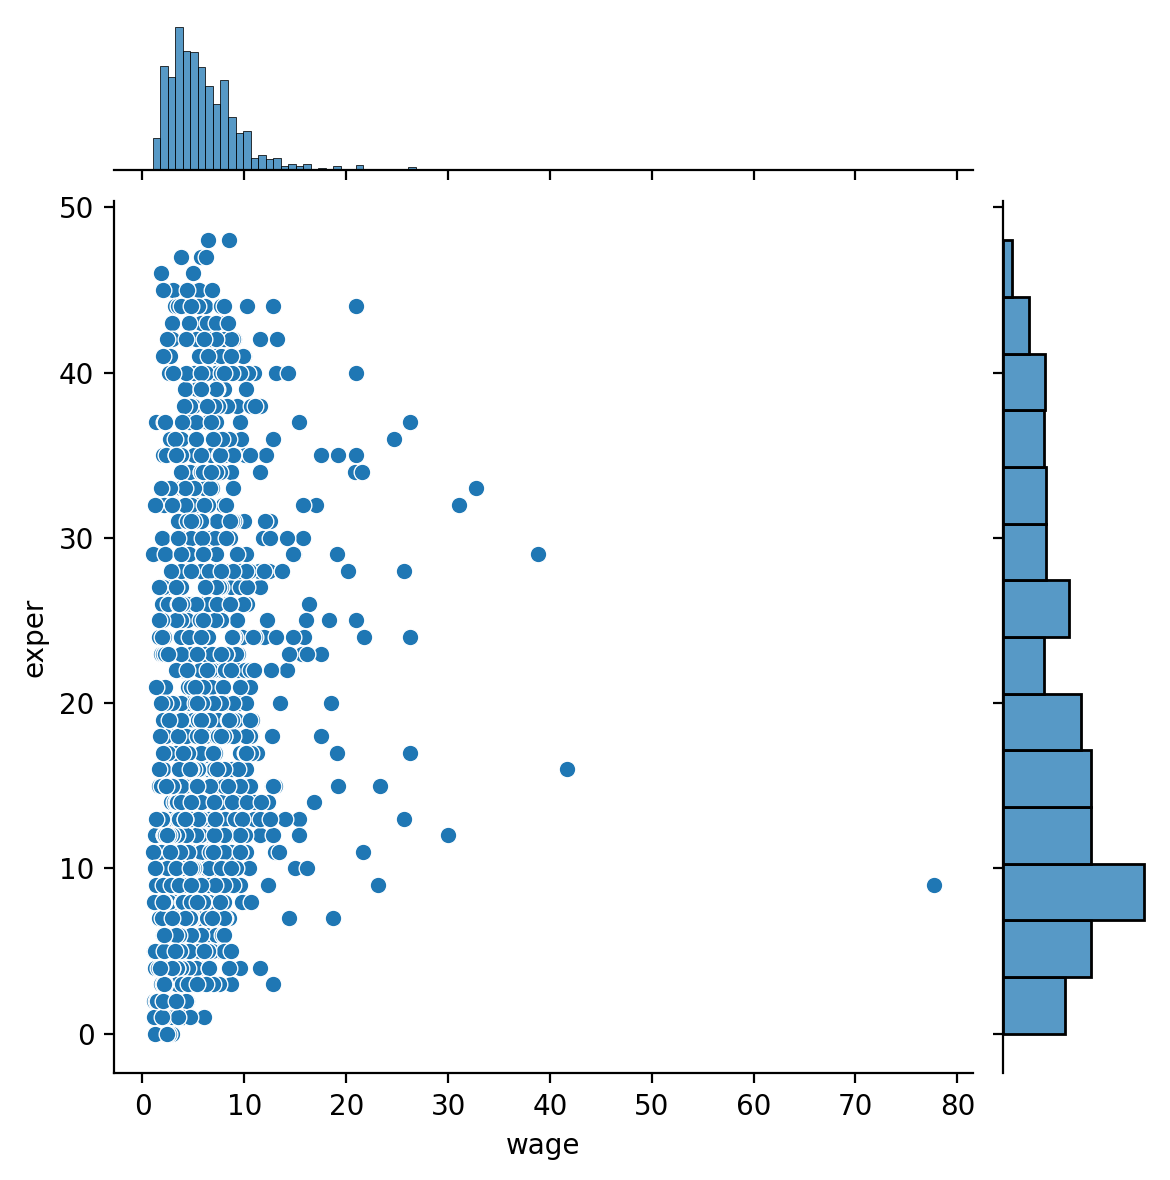

In [20]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter');

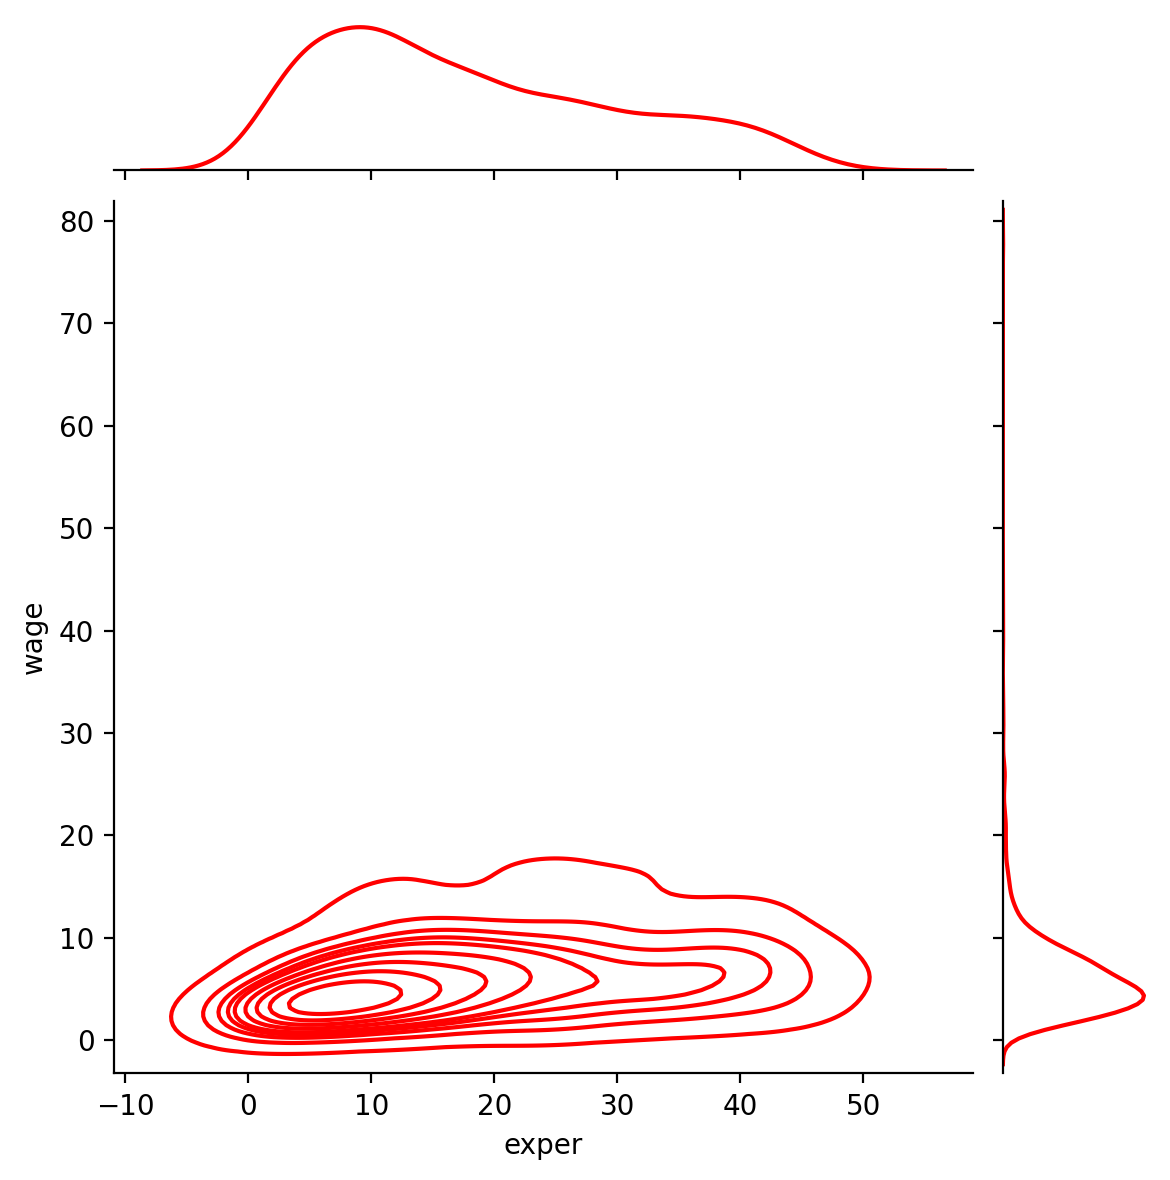

In [21]:
sns.jointplot('exper', 'wage', data=df, kind="kde", color="r");

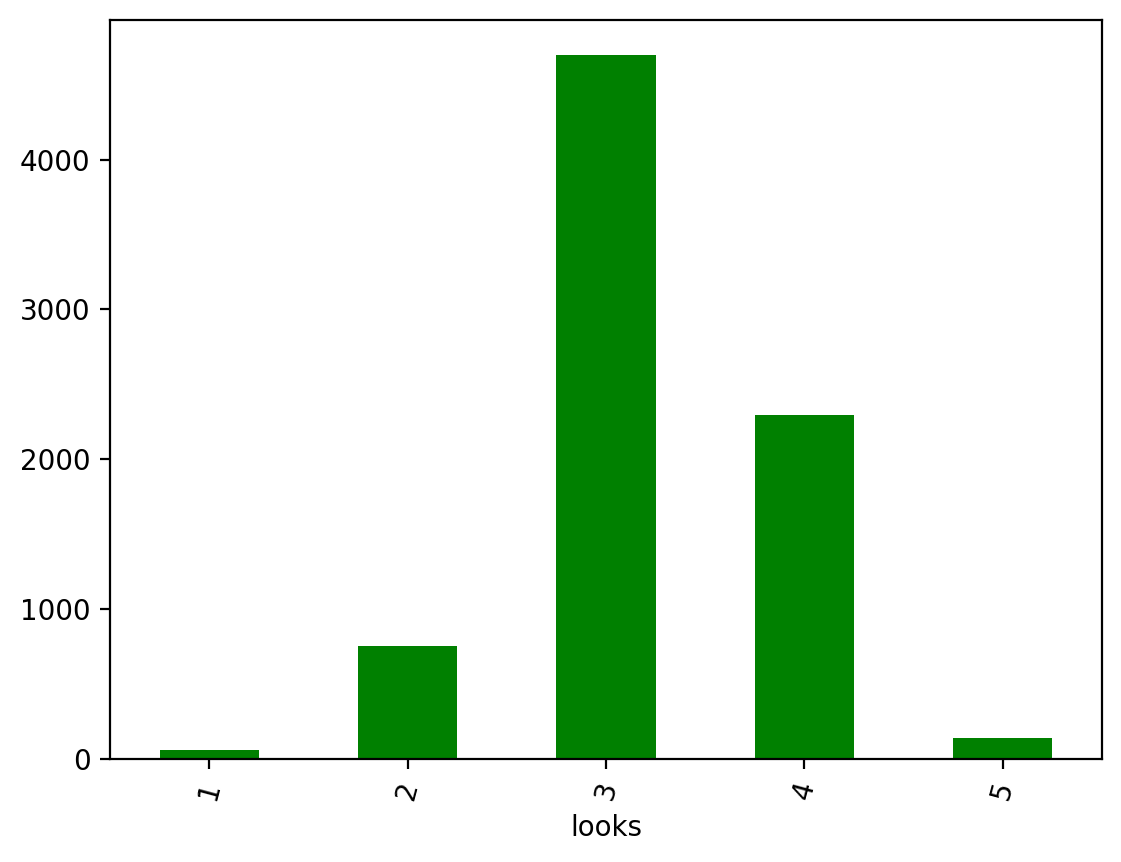

In [22]:
df.groupby('looks').wage.sum().plot(kind='bar', rot=75, color='green');

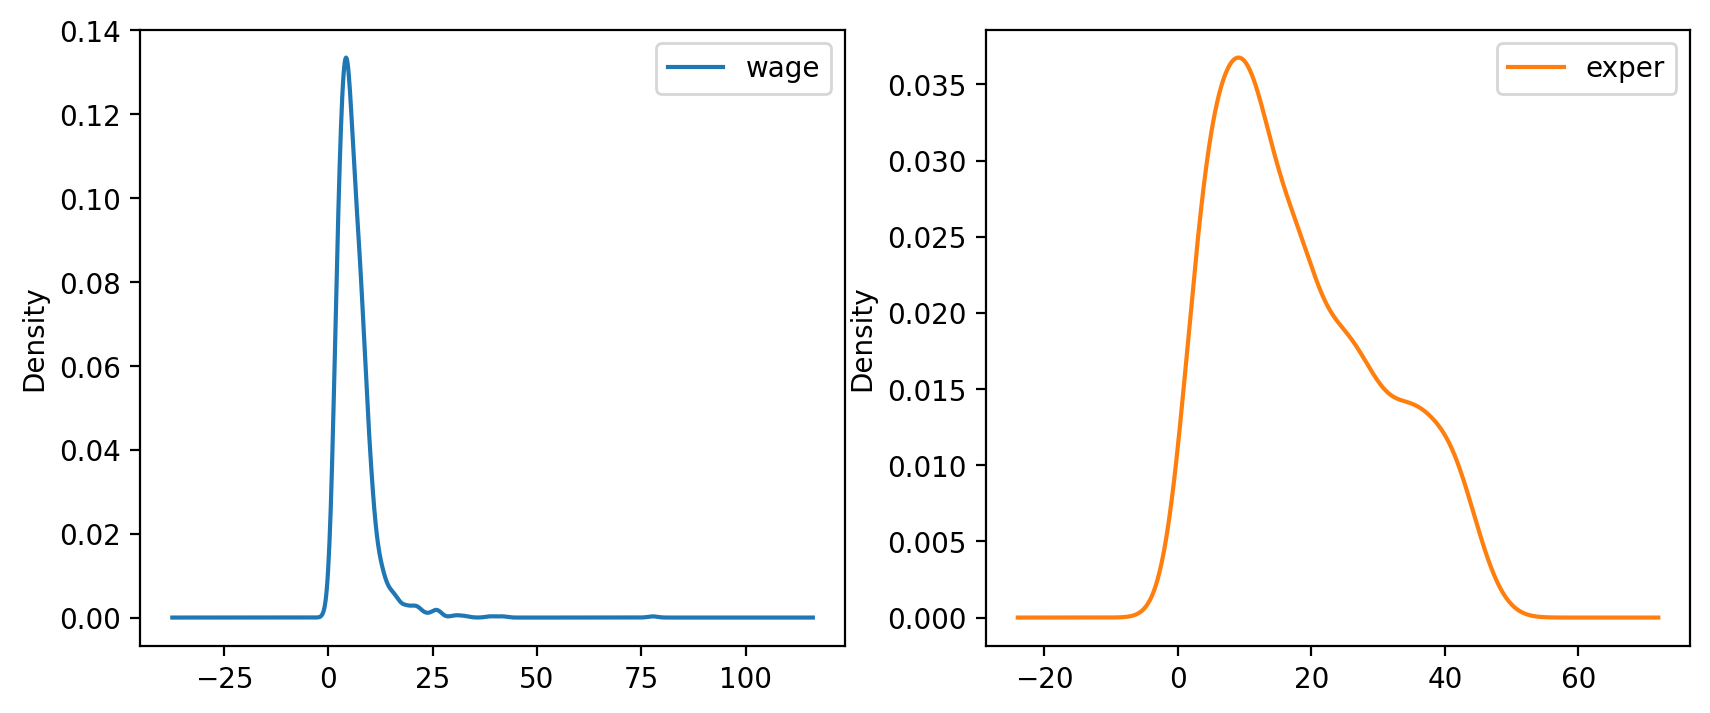

In [23]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4));

# 3D plot

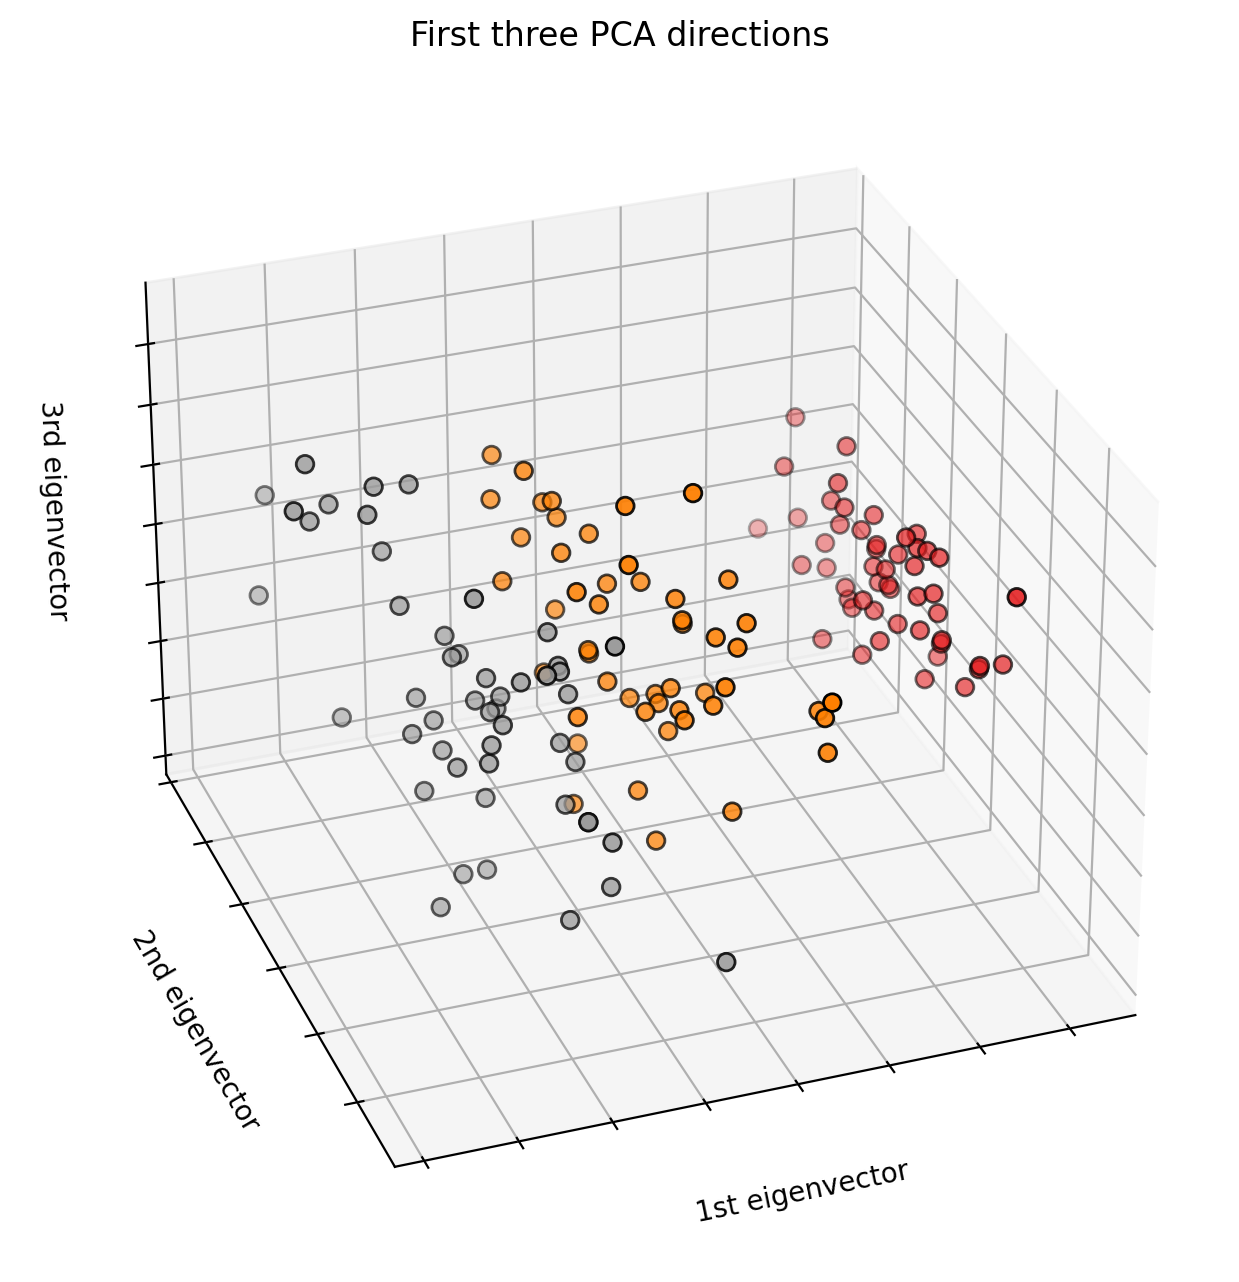

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
X_reduced = PCA(n_components=3).fit_transform(iris.data)


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()
